In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from scipy.cluster.vq import whiten
from sklearn.cluster import KMeans
import cv2


shape 1-  (268, 188, 3)
New shape-  (500, 350, 3)


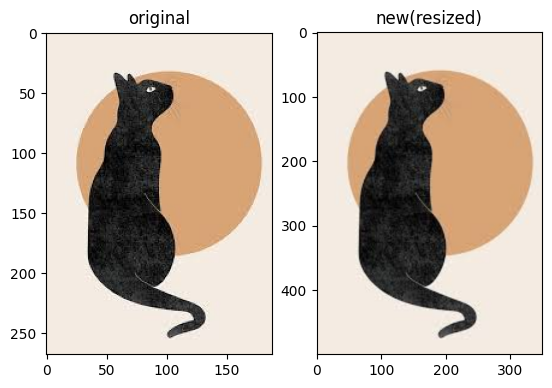

In [91]:
img1 = img.imread("./cat.jpg")   #---------------> just change the file path here, then go on executing each cell by shift+enter, or click on Run All
# img1 = img.imread("./flower.jpg")
# img3 = img.imread("./sitting.jpg")

print("shape 1- ", img1.shape)
# print("shape 2- ", img2.shape)
# print("shape 3- ", img3.shape)

num_colors = 2  # number of dominant colors to extract

r,c = img1.shape[:2]

req_r = 500
new_img = cv2.resize(img1 ,(int(req_r*float(c) / r), req_r))

print("New shape- ", new_img.shape)
plt.subplot(121)
plt.title("original")
plt.imshow(img1)
plt.subplot(122)
plt.title("new(resized)")
plt.imshow(new_img)
plt.show()

In [92]:
print(new_img.shape)
pixels = new_img.reshape((-1, 3))
pixels.shape

(500, 350, 3)


(175000, 3)

In [93]:
r,g,b=[],[],[]
for row in new_img:
    for r_val, g_val, b_val in row:
        r.append(r_val)
        g.append(g_val)
        b.append(b_val)

In [94]:
# using scipy inbuilt scaler whiten to scale
scaled_red = whiten(r)
scaled_blue = whiten(b)
scaled_green = whiten(g)

In [95]:
df = pd.DataFrame({'red':r,'blue':b,'green':g,'scaled_red':scaled_red,'scaled_blue':scaled_blue, 'scaled_green':scaled_green})
df.shape
df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,244,226,235,2.939412,2.858395,2.966601
1,244,226,235,2.939412,2.858395,2.966601
2,244,226,235,2.939412,2.858395,2.966601
3,244,226,235,2.939412,2.858395,2.966601
4,244,226,235,2.939412,2.858395,2.966601


In [ ]:
#using sklearn kmeans to cluster data and find cluster center(means)

k_means= KMeans(n_clusters=num_colors)
k_means.fit(pixels)
print(k_means.cluster_centers_)

[[ 33.8882092   32.90995013  32.09589154]
 [234.84561925 213.64253221 193.86742028]]


In [97]:
colors = np.asarray(k_means.cluster_centers_, dtype='uint8')
print(colors)

[[ 33  32  32]
 [234 213 193]]


Original Image --->


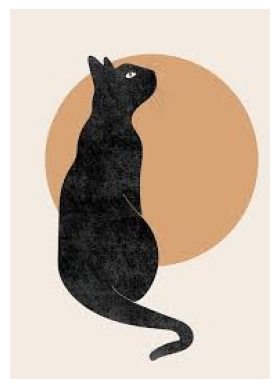

Resized Image --->


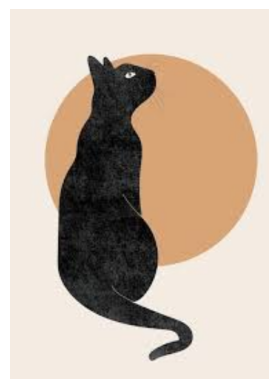

Dominant 2 Colours of Image --->


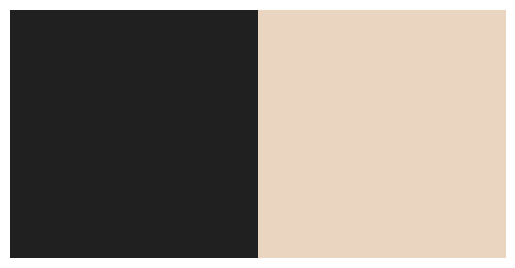

In [98]:
print("Original Image --->")
plt.axis('off')
plt.imshow(img1)
plt.show()

print("Resized Image --->")
plt.axis('off')
plt.imshow(new_img)
plt.show()

print("Dominant",num_colors,"Colours of Image --->")
plt.axis('off')
plt.imshow([colors])
plt.show()